In [1]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")
%matplotlib inline
pd.set_option('display.max_columns', 30)


In [5]:
df = pd.read_csv("/kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [7]:
df.drop('id', axis=1, inplace=True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [9]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [12]:
df['packed_cell_volume']

0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: packed_cell_volume, Length: 400, dtype: object

In [13]:
df['packed_cell_volume'] = pd.to_numeric(df.packed_cell_volume, errors = 'coerce') #if there is any NAN value, coerce won't throw any errors


In [14]:
df['packed_cell_volume']

0      44.0
1      38.0
2      31.0
3      32.0
4      35.0
       ... 
395    47.0
396    54.0
397    49.0
398    51.0
399    53.0
Name: packed_cell_volume, Length: 400, dtype: float64

In [19]:
#df['white_blood_cell_count'] = df['white_blood_cell_count'].astype(float, errors = 'ignore')
#df['white_blood_cell_count']

In [17]:
df['white_blood_cell_count'] = pd.to_numeric(df.white_blood_cell_count, errors = 'coerce')
df['white_blood_cell_count']

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: white_blood_cell_count, Length: 400, dtype: float64

In [18]:
df['red_blood_cell_count'] = pd.to_numeric(df.red_blood_cell_count, errors = 'coerce')
df['red_blood_cell_count']

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: red_blood_cell_count, Length: 400, dtype: float64

In [20]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [21]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [22]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [23]:
for col in cat_cols:
  print(f"{col} has {df[col].unique()} vaulues. \n")

red_blood_cells has [nan 'normal' 'abnormal'] vaulues. 

pus_cell has ['normal' 'abnormal' nan] vaulues. 

pus_cell_clumps has ['notpresent' 'present' nan] vaulues. 

bacteria has ['notpresent' 'present' nan] vaulues. 

hypertension has ['yes' 'no' nan] vaulues. 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] vaulues. 

coronary_artery_disease has ['no' 'yes' '\tno' nan] vaulues. 

appetite has ['good' 'poor' nan] vaulues. 

peda_edema has ['no' 'yes' nan] vaulues. 

aanemia has ['no' 'yes' nan] vaulues. 

class has ['ckd' 'ckd\t' 'notckd'] vaulues. 



In [24]:
df['diabetes_mellitus'].replace(to_replace = {'\tno' : 'no', '\tyes' : 'yes', 'ckd\t' : 'ckd'}, inplace = True)

In [25]:
df['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no', inplace = True)

In [27]:

df['class'] = df['class'].replace(to_replace = { 'ckd\t' : 'ckd', 'notckd' : 'not ckd'}, inplace = True)

In [28]:
df['class'] = df['class'].map({'ckd':0, 'not ckd':1})

In [29]:
df['class']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
395   NaN
396   NaN
397   NaN
398   NaN
399   NaN
Name: class, Length: 400, dtype: float64

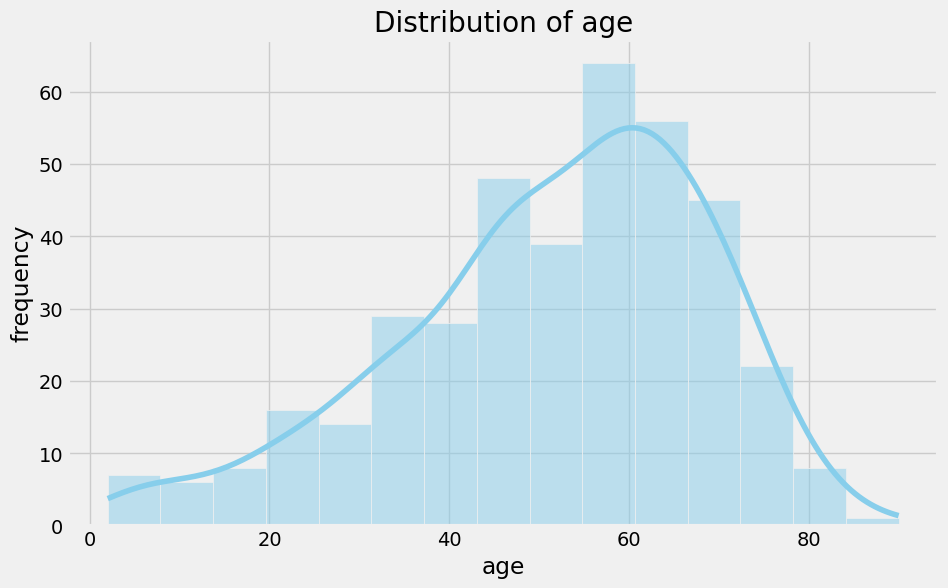

In [30]:
#univariate analysis

plt.figure(figsize = (10,6))
sns.histplot(df['age'].dropna(), kde = True, color = 'skyblue')
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()


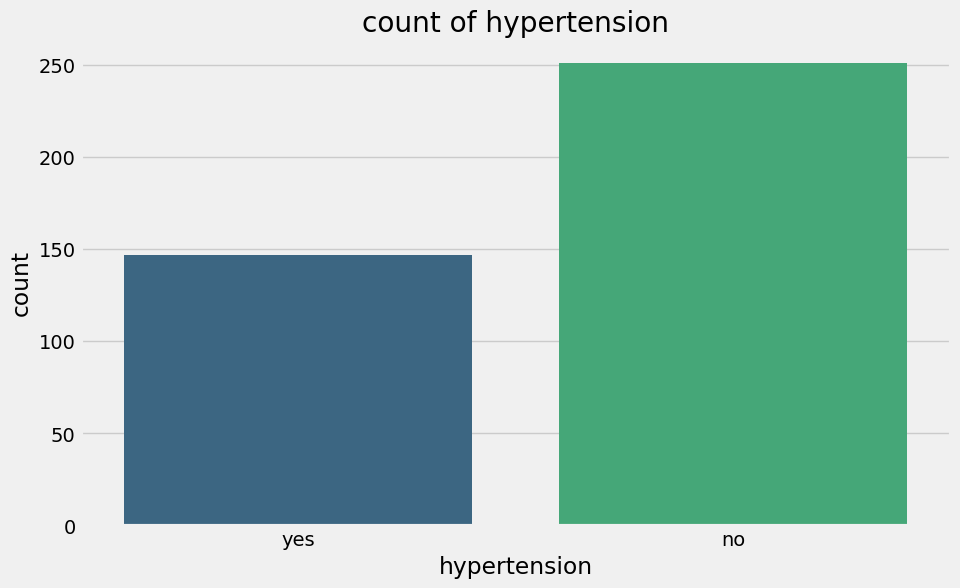

In [33]:
#univariate analysis

plt.figure(figsize = (10,6))
sns.countplot(x = 'hypertension', data = df, palette = 'viridis')
plt.title('count of hypertension')
plt.xlabel('hypertension')
plt.ylabel('count')
plt.show()

In [36]:
df_temp = df[df['class'] == 0]

In [37]:
df_temp['hypertension'].value_counts()

Series([], Name: hypertension, dtype: int64)

ValueError: List of boxplot statistics and `positions` values must have same the length

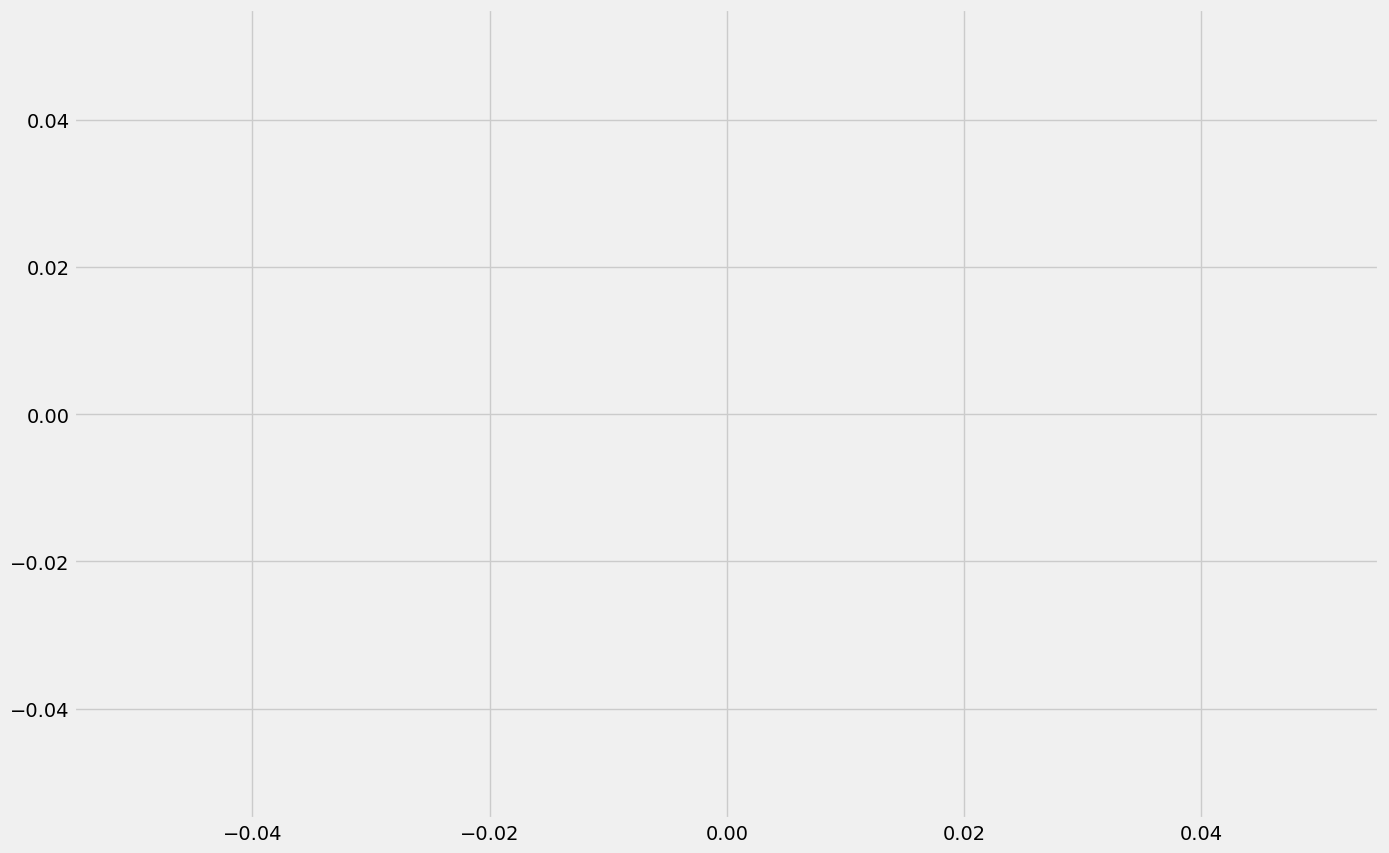

In [41]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'class', y = 'blood_urea', data =df)
plt.xlabel('class')
plt.ylabel('blood_urea')
plt.title('boxplot of blood_urea by class')
plt.show()

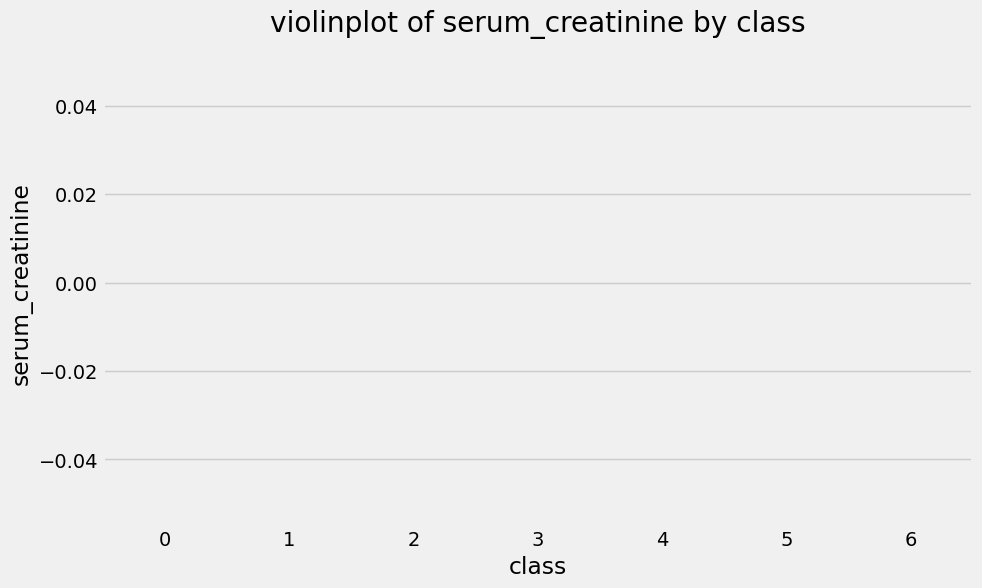

In [40]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'class', y = 'serum_creatinine', data =df)
plt.xlabel('class')
plt.ylabel('serum_creatinine')
plt.title('violinplot of serum_creatinine by class')
plt.show()

<Axes: ylabel='appetite'>

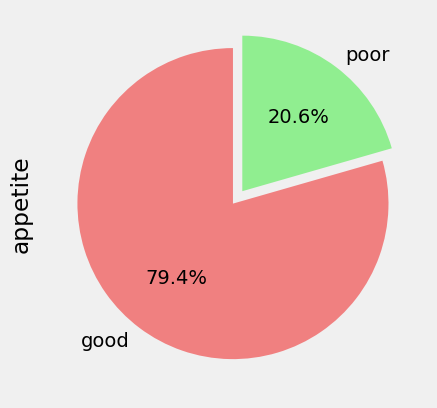

In [42]:
df['appetite'].value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'lightgreen'], explode = (0, 0.1), startangle = 90)

<Axes: ylabel='appetite'>

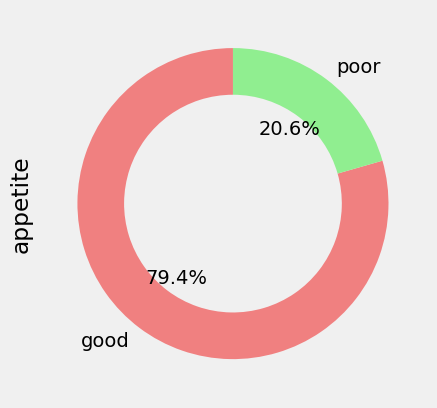

In [43]:
df['appetite'].value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'lightgreen'], wedgeprops = dict(width = 0.3), startangle = 90)

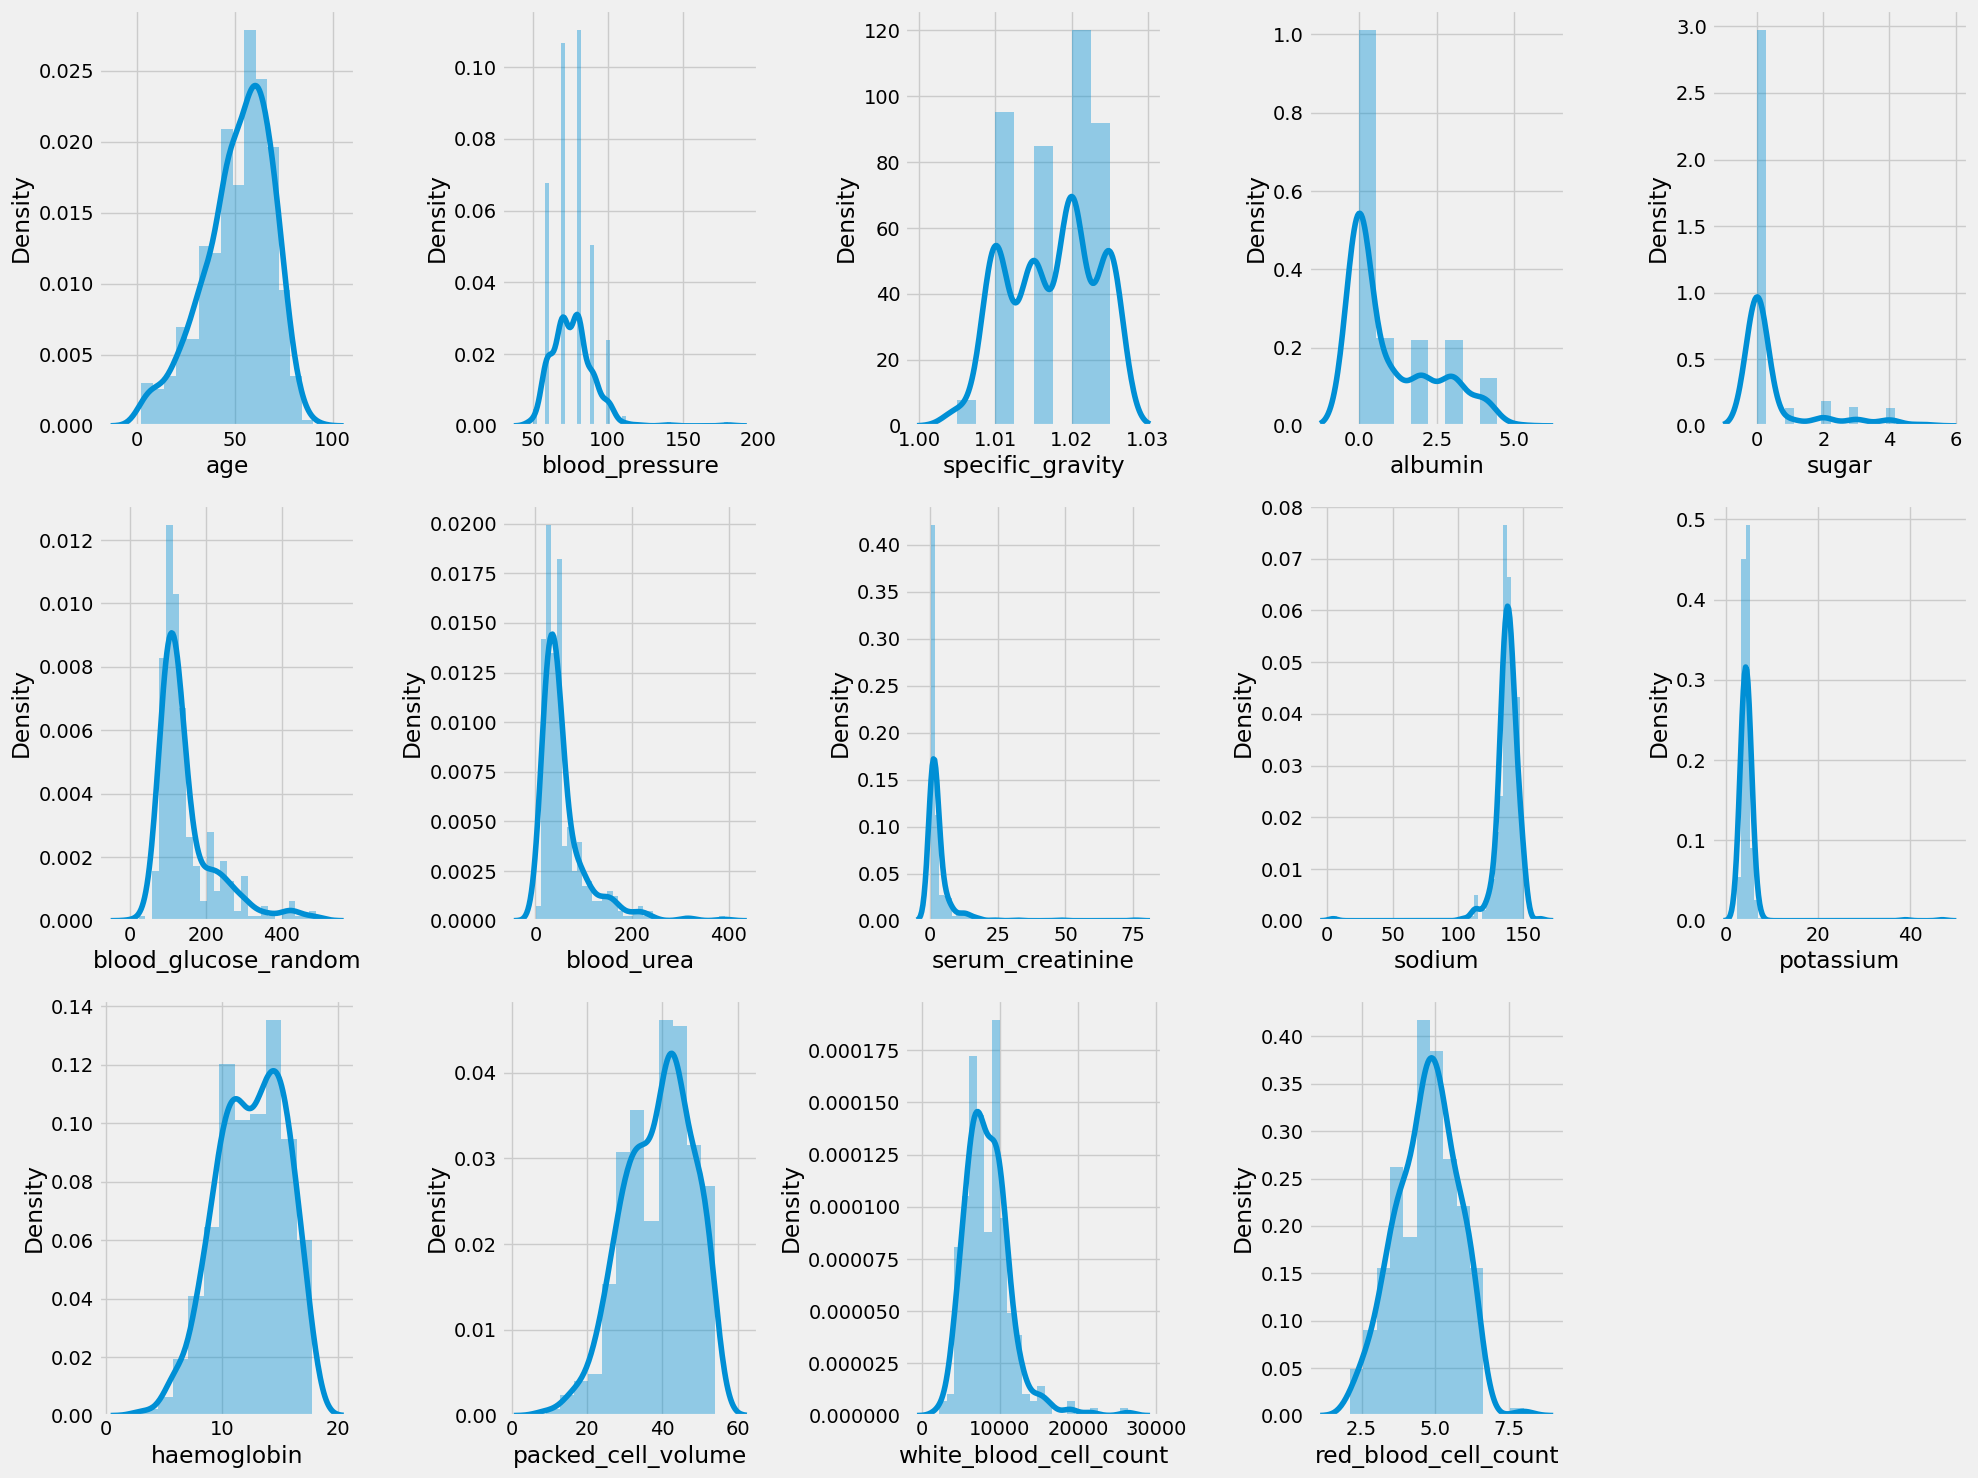

In [47]:
plt.figure(figsize = (20,15))
plotnumber =1

for col in num_cols:
  if plotnumber <= 15:
    ax = plt.subplot(3, 5, plotnumber)
    sns.distplot(df[col])
    plt.xlabel(col)
  plotnumber +=1

plt.tight_layout()
plt.show()

In [44]:
#how many people have hypertension with poor appetite
#how many people have hypertension with chronic disease have poor appetite

In [50]:
def kde(col):
  grid = sns.FacetGrid(df, hue = "class", height =6, aspect =2)
  grid.map(sns.kdeplot, col)
  grid.add_legend()

IndexError: list index out of range

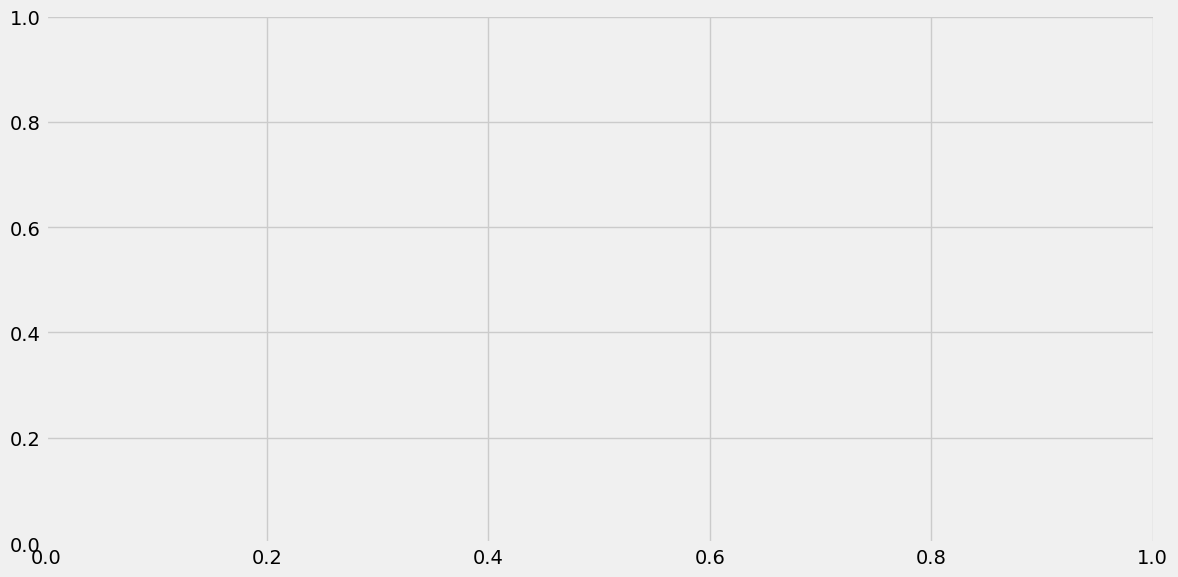

In [51]:
kde('white_blood_cell_count')

In [ ]:
def volin(col):
  fig = px.violin(df, y=col, x='class', box =  )

<Axes: >

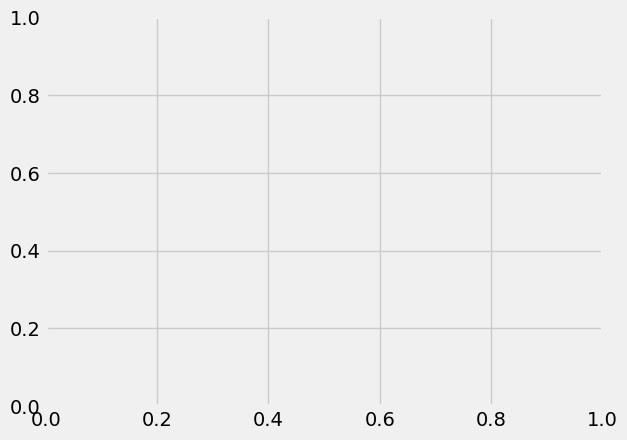

In [55]:
sns.scatterplot(x = 'age', y ='blood_pressure', data = df, hue ='class')

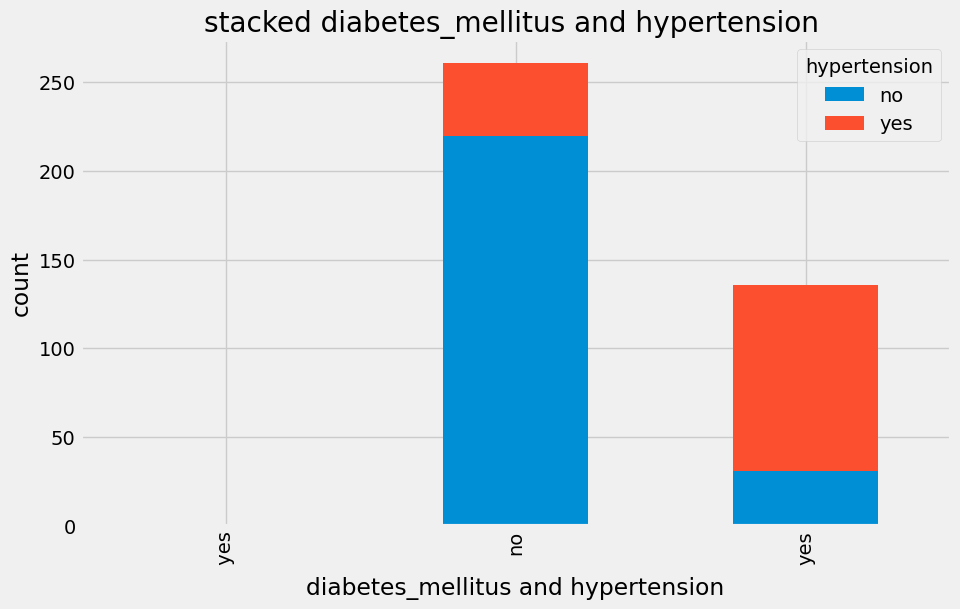

In [57]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
diabetes_hypertension.plot(kind = 'bar', stacked = True, figsize = (10,6))

plt.xlabel('diabetes_mellitus and hypertension')
plt.ylabel('count')
plt.legend(title='hypertension')
plt.title('stacked diabetes_mellitus and hypertension ')
plt.show()

In [59]:
def scatter(col1,col2):
    fig = px.scatter(df, x= col1, y=col2, color= "class", template = "plotly_dark")
    return fig.show()

In [61]:
scatter('haemoglobin','packed_cell_volume')

In [ ]:
#multivariate analysis
 selected_columns = ['age', 'blood_pressure', 'haemoglobin', 'class' ]
 sns.pairplot(df[selected_columns], hue= 'class' )

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")
%matplotlib inline
pd.set_option('display.max_columns', 30)

In [63]:
df1 =pd.read_csv("/us_perm_visas.csv")

In [64]:
df1.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_address_1,employer_address_2,...,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,NaN,ARMENIA,2012-02-01,24 WEST 25 STREET,5TH FLOOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT,75629.00,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,NaN,POLAND,2011-12-21,200 BROAD STREET,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Economic Sector,37024.00,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,NaN,INDIA,2011-12-01,1054 TECHNOLOGY PARK DRIVE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aerospace,47923.00,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,NaN,SOUTH KOREA,2011-12-01,33-17 PRINCE ST. 2ND FL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,NaN,CANADA,2012-01-26,1373 BROADWAY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Advanced Mfg,100000.00,NaN,yr,NaN,NaN,NaN


In [66]:
df1.shape

(28129, 154)

In [67]:
df1.isna().sum()

add_these_pw_job_title_9089      20663
agent_city                       28129
agent_firm_name                  28129
agent_state                      28129
application_type                     0
                                 ...  
wage_offer_to_9089               23480
wage_offer_unit_of_pay_9089       7555
wage_offered_from_9089           20577
wage_offered_to_9089             26146
wage_offered_unit_of_pay_9089    28129
Length: 154, dtype: int64

In [68]:
df1.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [69]:
df1.dtypes

add_these_pw_job_title_9089       object
agent_city                       float64
agent_firm_name                  float64
agent_state                      float64
application_type                  object
                                  ...   
wage_offer_to_9089               float64
wage_offer_unit_of_pay_9089       object
wage_offered_from_9089           float64
wage_offered_to_9089             float64
wage_offered_unit_of_pay_9089    float64
Length: 154, dtype: object

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [74]:
df1.describe()

,agent_city,agent_firm_name,agent_state,case_number,case_received_date,employer_country,employer_decl_info_title,employer_num_employees,employer_phone,employer_phone_ext,employer_yr_estab,foreign_worker_info_alt_edu_experience,foreign_worker_info_birth_country,foreign_worker_info_city,foreign_worker_info_education,...,ri_job_search_website_from,ri_job_search_website_to,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,wage_offer_from_9089,wage_offer_to_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.057200e+04,4.649000e+03,7.552000e+03,1983.000000,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.129925e+04,1.128513e+05,9.108085e+04,115721.919899,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.780154e+05,2.029880e+05,2.488435e+05,47451.743239,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.250000e+00,0.000000e+00,7.500000e+00,10.520000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.514800e+04,8.313800e+04,7.034530e+04,90600.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.443774e+04,1.050000e+05,8.635150e+04,118200.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.053730e+05,1.255600e+05,1.050000e+05,142398.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.117584e+07,9.603360e+06,1.629060e+07,400000.000000,NaN


In [76]:
df1.columns.values

array(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       'country_of_citizenship', 'country_of_citzenship', 'decision_date',
       'employer_address_1', 'employer_address_2', 'employer_city',
       'employer_country', 'employer_decl_info_title', 'employer_name',
       'employer_num_employees', 'employer_phone', 'employer_phone_ext',
       'employer_postal_code', 'employer_state', 'employer_yr_estab',
       'foreign_worker_info_alt_edu_experience',
       'foreign_worker_info_birth_country', 'foreign_worker_info_city',
       'foreign_worker_info_education',
       'foreign_worker_info_education_other', 'foreign_worker_info_inst',
       'foreign_worker_info_major', 'foreign_worker_info_postal_code',
       'foreign_worker_info_rel_occup_exp',
       'foreign_worker_info_req_experience', 'foreign_worker_info_state',
       'forei

In [78]:
df1['case_number']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
28124   NaN
28125   NaN
28126   NaN
28127   NaN
28128   NaN
Name: case_number, Length: 28129, dtype: float64

In [79]:
df1['case_no']

0        A-07323-97014
1        A-07332-99439
2        A-07333-99643
3        A-07339-01930
4        A-07345-03565
             ...      
28124    A-12184-78547
28125    A-12184-78548
28126    A-12184-78552
28127    A-12184-78556
28128    A-12184-78569
Name: case_no, Length: 28129, dtype: object

In [80]:
df1.drop("case_no", axis=1, inplace = True)

In [81]:
df1.case_status

0                Certified
1                   Denied
2                Certified
3                Certified
4                Certified
               ...        
28124    Certified-Expired
28125    Certified-Expired
28126            Certified
28127    Certified-Expired
28128    Certified-Expired
Name: case_status, Length: 28129, dtype: object

In [91]:
df2 = df1[df1["case_status"] != "Withdrawn"]

TypeError: string indices must be integers

In [89]:
df1 = df1.loc[df1.case_status == "Certified_Expired", "case_status"] = "Certified"

AttributeError: 'str' object has no attribute 'loc'

In [87]:
df1.case_status.unique()

AttributeError: 'Series' object has no attribute 'case_status'